In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Frist let's load the cleaned up dataset
url = "https://raw.githubusercontent.com/sanjanabansal1994/Early-Stage-Diabetes-Risk-Prediction/mehrdadmalekmo/modeling/data/processed.csv"
dataset = pd.read_csv(url)
dataset.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group__34,age_group_35_49,age_group_50_64,age_group_65_
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0


In [4]:
# Define X (features) and Y (target)
X = dataset.drop('class', axis=1)
y = dataset['class']

In [5]:
# Split the data into training and tesing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=63)

In [6]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
classifier = LogisticRegression(random_state = 0)

# Train the model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9230769230769231
Confusion Matrix:
 [[38  3]
 [ 5 58]]


In [7]:
# What about other metrics?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.95      0.92      0.94        63

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



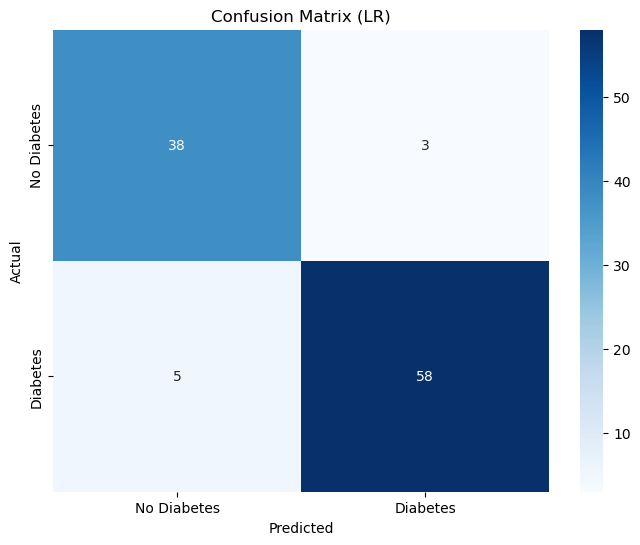

In [8]:
# PLot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LR)')
plt.show()

In [9]:
# Extract coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': classifier.coef_[0]})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

               Feature  Coefficient  Abs_Coefficient
2           polydipsia     2.775471         2.775471
0               gender    -2.662052         2.662052
1             polyuria     2.588223         2.588223
9         irritability     1.815136         1.815136
8              itching    -1.451838         1.451838
6       genital_thrush     1.230846         1.230846
11     partial_paresis     0.870982         0.870982
5           polyphagia     0.770664         0.770664
18       age_group_65_    -0.587302         0.587302
7      visual_blurring     0.578075         0.578075
16     age_group_35_49     0.567950         0.567950
10     delayed_healing    -0.515955         0.515955
3   sudden_weight_loss     0.515262         0.515262
13            alopecia    -0.400841         0.400841
12    muscle_stiffness    -0.362693         0.362693
17     age_group_50_64     0.155624         0.155624
4             weakness     0.097280         0.097280
15       age_group__34    -0.094984         0.